In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import naive_bayes
import cv2
%matplotlib inline
duck=cv2.imread('duck.jpg')
duck=cv2.cvtColor(duck,cv2.COLOR_RGB2GRAY)
for i in range(213):
    for j in range(427): 
        if duck[i][j]<=225: duck[i][j]=0
x_train=cv2.imread('duck.jpg')
x_train=cv2.cvtColor(x_train,cv2.COLOR_RGB2GRAY)
x_train=np.reshape(x_train,(213*427,1))
y_train=np.zeros((213,427))
for i in range(213):
    for j in range(427):
        if duck[i][j]>0:
            y_train[i][j]=1
y_train=np.reshape(y_train,(213*427))
for i in range(4):
    print('請輸入非duck圖片名稱')
    non_duck=cv2.imread(input())
    non_duck=cv2.cvtColor(non_duck,cv2.COLOR_RGB2GRAY)
    x_train_non=np.reshape(non_duck,(non_duck.shape[0]*non_duck.shape[1],1))
    y_train_non=np.zeros((non_duck.shape[0]*non_duck.shape[1]))
    x_train=np.concatenate((x_train,x_train_non))
    x_train=np.concatenate((x_train,x_train_non))
    y_train=np.concatenate((y_train,y_train_non))
    y_train=np.concatenate((y_train,y_train_non))
bayesian=sklearn.naive_bayes.GaussianNB(priors=(0.5,0.5))
bayesian.fit(x_train,y_train)

請輸入非duck圖片名稱
non_duck.jpg
請輸入非duck圖片名稱
non_duck1.jpg
請輸入非duck圖片名稱
non_duck2.jpg
請輸入非duck圖片名稱
non_duck3.jpg


GaussianNB(priors=(0.5, 0.5), var_smoothing=1e-09)

In [2]:
x_train.shape

(2719447, 1)

True

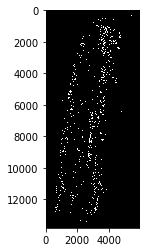

In [3]:
fullduck=cv2.imread('full_duck.jpg')
fullduck=cv2.cvtColor(fullduck,cv2.COLOR_RGB2GRAY)
plt.imshow(fullduck,cmap='gray')
fullduck=np.reshape(fullduck,(13816*5946,1))
result=bayesian.predict(fullduck)
result=np.reshape(result,(13816,5946))
for i in range(13816):
    for j in range(5946):
        if result[i][j]>0:
            result[i][j]=240
plt.imshow(result,cmap='gray')
cv2.imwrite('output1.jpg', result)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature
%matplotlib inline
edges2 = feature.canny(result, sigma=3)
ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()